<a href="https://colab.research.google.com/github/yingzibu/drug_design_JAK/blob/main/representation/group_selfies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/aspuru-guzik-group/group-selfies.git

Cloning into 'group-selfies'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 206 (delta 80), reused 154 (delta 49), pack-reused 9
Receiving objects: 100% (206/206), 13.15 MiB | 7.74 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [3]:
cd /content/group-selfies

/content/group-selfies


In [ ]:
! pip install . --quiet

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm import tqdm
from group_selfies import (
    fragment_mols,
    Group,
    MolecularGraph,
    GroupGrammar,
    group_encoder
)

from rdkit.Chem.Draw import IPythonConsole

from IPython.display import display
from tutorial.test_utils import *
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')

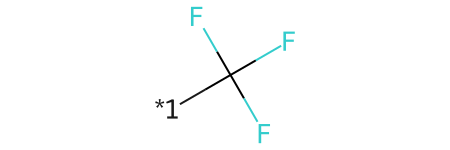

In [8]:
g = Group('trifluoromethane', '*1C(F)(F)F')
display(g.mol)

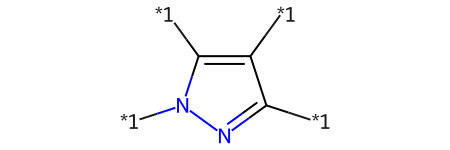

In [9]:
g2 = Group('pyrazole', 'N1C=CC=N1', all_attachment=True)
display(g2.mol)

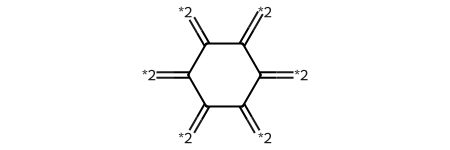

In [10]:
#one attachment point per atom
g_test = Group('cyclohexane', 'C1CCCCC1', all_attachment=True)
display(g_test.mol)

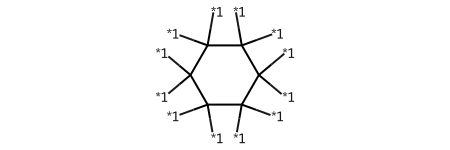

In [11]:
#multiple attachment points per atom
g_test2 = Group('cyclohexane2', 'C(*1)(*1)1C(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)1')
display(g_test2.mol)

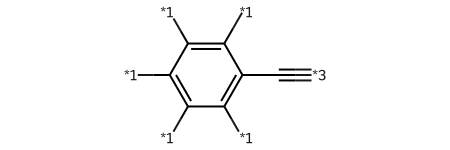

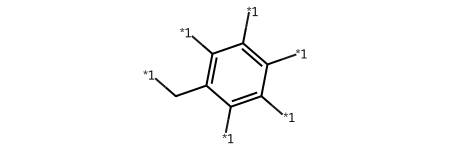

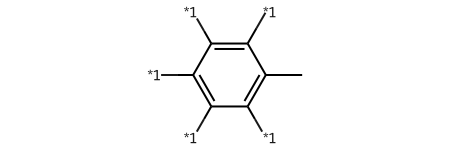

In [12]:
#default all attachment points
g3_test = Group('toluene', 'CC1=CC=CC=C1', all_attachment=True)
display(g3_test.mol)

#remove 2 valency from the methyl carbon, thereby making the attachment point have valency 1
g3_test = Group('toluene', 'C(*2)C1=CC=CC=C1', all_attachment=True)
display(g3_test.mol)

#remove 3 valency from the methyl carbon, thereby removing the attachment point
g3 = Group('toluene', 'C(*3)C1=CC=CC=C1', all_attachment=True)
display(g3.mol)

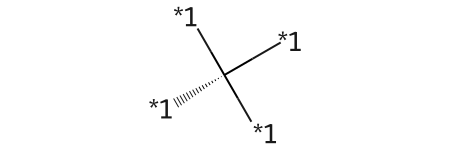

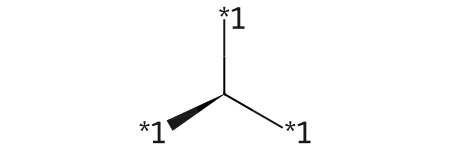

In [13]:
g4 = Group('chiral', '*x1[C@](*x1)(*x1)(*1)', priority=10) #at least 3 attachment points must be filled
g5 = Group('chiral2', '*x1[C@H](*x1)(*x1)', priority=10)
display(g4.mol)
display(g5.mol)

In [14]:
grammar = GroupGrammar([g, g2, g3, g4, g5]) #creating a grammar using a list
grammar.vocab

{'trifluoromethane': <Group trifluoromethane *1C(F)(F)F>,
 'pyrazole': <Group pyrazole N1=C(*1)-C(*1)=C(*1)-N-1*1>,
 'toluene': <Group toluene C-C1=C(*1)-C(*1)=C(*1)-C(*1)=C-1*1>,
 'chiral': <Group chiral *x1[C@](*x1)(*x1)(*1)>,
 'chiral2': <Group chiral2 *x1[C@H](*x1)(*x1)>}

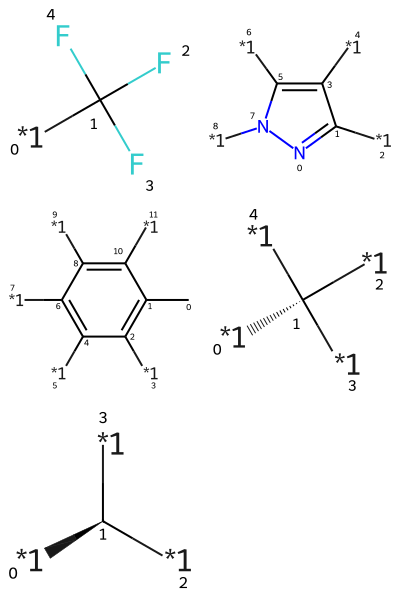

In [15]:
display(DrawMolsZoomed([g.mol for g in grammar.vocab.values()], molsPerRow=2))

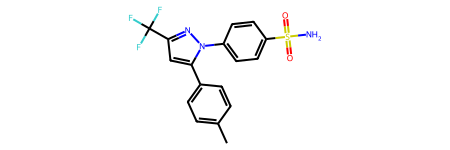

[(<Group toluene C-C1=C(*1)-C(*1)=C(*1)-C(*1)=C-1*1>,
  [(0, 0), (1, 1), (2, 2), (3, 4), (4, 6), (5, 8), (6, 10)],
  [((7, 4), 7)]),
 (<Group pyrazole N1=C(*1)-C(*1)=C(*1)-N-1*1>,
  [(10, 0), (9, 1), (8, 3), (7, 5), (11, 7)],
  [((22, 9), 2), ((4, 7), 6), ((12, 11), 8)]),
 (<Group trifluoromethane *1C(F)(F)F>,
  [(22, 1), (23, 2), (24, 3), (25, 4)],
  [((9, 22), 0)])]

In [16]:
m = Chem.MolFromSmiles('CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F') #celcoxib
display(m)
#extracting group matches from the molecule
extracted = grammar.extract_groups(m)
extracted

In [17]:
encoded = grammar.encoder(m, extracted)
encoded

'[:0toluene][Ring2][:2pyrazole][Ring2][:0trifluoromethane][pop][Branch][C][=C][C][=C][Branch][C][=C][Ring1][=Branch][pop][S][=Branch][=O][pop][=Branch][=O][pop][N][pop][pop]'

In [18]:
encoded = grammar.full_encoder(m)
encoded

'[:0toluene][Ring2][:2pyrazole][Ring2][:0trifluoromethane][pop][Branch][C][=C][C][=C][Branch][C][=C][Ring1][=Branch][pop][S][=Branch][=O][pop][=Branch][=O][pop][N][pop][pop]'

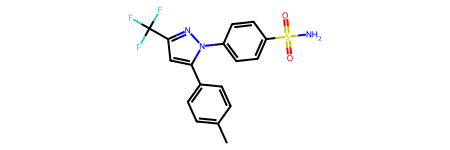

In [19]:
decoded = grammar.decoder(encoded)
decoded

Original Compound:


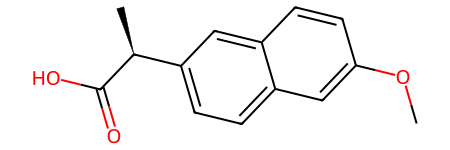

[C][O][C][=C][C][=C][C][=C][Branch][C][=C][Branch][C][=C][Ring1][=N][pop][Ring1][=Branch][pop][:0chiral2][Ring1][C][pop][Ring1][C][=Branch][=O][pop][O][pop]
Encoded-decoded Compound:


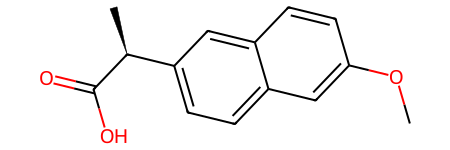

In [37]:
m2 = Chem.MolFromSmiles('COc1cc2ccc(cc2cc1)[C@H](C)C(=O)O')
print('Original Compound:')
display(m2)
extracted = grammar.extract_groups(m2)
encoded = grammar.encoder(m2, extracted)
print(encoded)
decoded = grammar.decoder(encoded)
print('Encoded-decoded Compound:')
display(decoded)

In [43]:
extracted

[(<Group chiral2 *x1[C@H](*x1)(*x1)>,
  [(12, 1)],
  [((7, 12), 0), ((13, 12), 2), ((14, 12), 3)])]

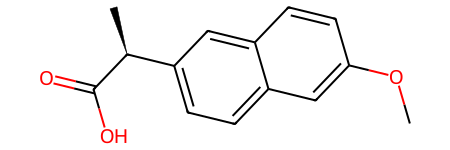

In [39]:
display(grammar.decoder(grammar.full_encoder(m2)))

Original Compound:


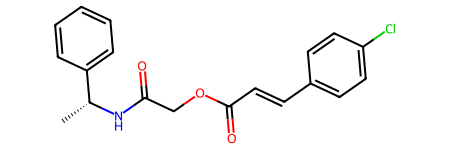

[C][:0chiral2][Ring2][N][C][=Branch][=O][pop][C][O][C][=Branch][=O][pop][/C][=C][/C][=C][C][=C][Branch][Cl][pop][C][=C][Ring1][#Branch][pop][Ring2][C][=C][C][=C][C][=C][Ring1][=Branch][pop]
Encoded-decoded Compound:


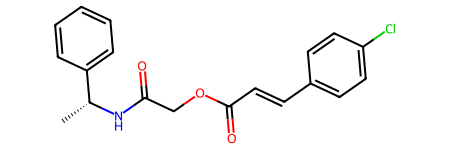

In [21]:
# double bond stereochem
m3 = Chem.MolFromSmiles('C[C@@H](NC(=O)COC(=O)/C=C/c1ccc(Cl)cc1)c1ccccc1')
print('Original Compound:')
display(m3)
extracted = grammar.extract_groups(m3)
encoded = grammar.encoder(m3, extracted)
print(encoded)
decoded = grammar.decoder(encoded)
print('Encoded-decoded Compound:')
display(decoded)

In [22]:
grammar.to_file('test_grammar.txt') #save
grammar2 = GroupGrammar(vocab={}) #empty grammar

#with no grammar
m = Chem.MolFromSmiles('CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F')
extracted = grammar2.extract_groups(m)
encoded = grammar2.encoder(m, extracted)
print('Without loaded grammar:')
print(encoded)
print()

#load
grammar2 = GroupGrammar.from_file('test_grammar.txt')

#with loaded grammar
extracted = grammar2.extract_groups(m)
encoded = grammar2.encoder(m, extracted)
print('With loaded grammar:')
print(encoded)

Without loaded grammar:
[C][C][=C][C][=C][Branch][C][=C][Ring1][=Branch][pop][C][=C][C][=Branch][=N][N][Branch][C][=C][C][=C][Branch][C][=C][Ring1][=Branch][pop][S][=Branch][=O][pop][=Branch][=O][pop][N][pop][Ring1][Branch][pop][C][Branch][F][pop][Branch][F][pop][F]

With loaded grammar:
[:0toluene][Ring2][:2pyrazole][Ring2][:0trifluoromethane][pop][Branch][C][=C][C][=C][Branch][C][=C][Ring1][=Branch][pop][S][=Branch][=O][pop][=Branch][=O][pop][N][pop][pop]


Original Compound:


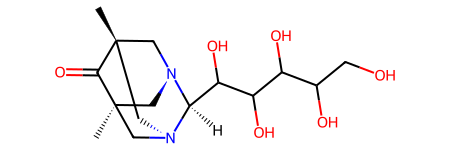


Without essential set:


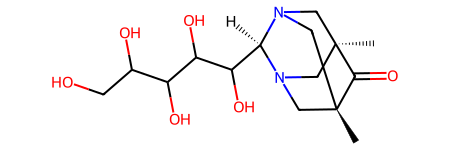

With essential set:


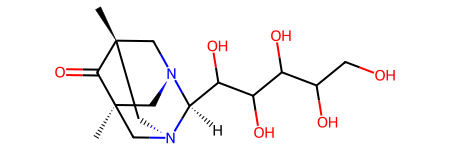

In [23]:
#test that fails without essential set
m = Chem.MolFromSmiles('C[C@]12C[N@]3C[C@](C)(C[N@](C1)[C@@H]3C(O)C(O)C(O)C(O)CO)C2=O')
print('Original Compound:')
display(m)
print()

#grammar without essential set
print('Without essential set:')
extracted = grammar.extract_groups(m)
encoded = grammar.encoder(m, extracted)
decoded = grammar.decoder(encoded)
display(decoded)

#load essential set and merge with current grammar
new_grammar = grammar | GroupGrammar.essential_set()

#grammar with essential set
print('With essential set:')
extracted = new_grammar.extract_groups(m)
encoded = new_grammar.encoder(m, extracted)
decoded = new_grammar.decoder(encoded)
display(decoded)

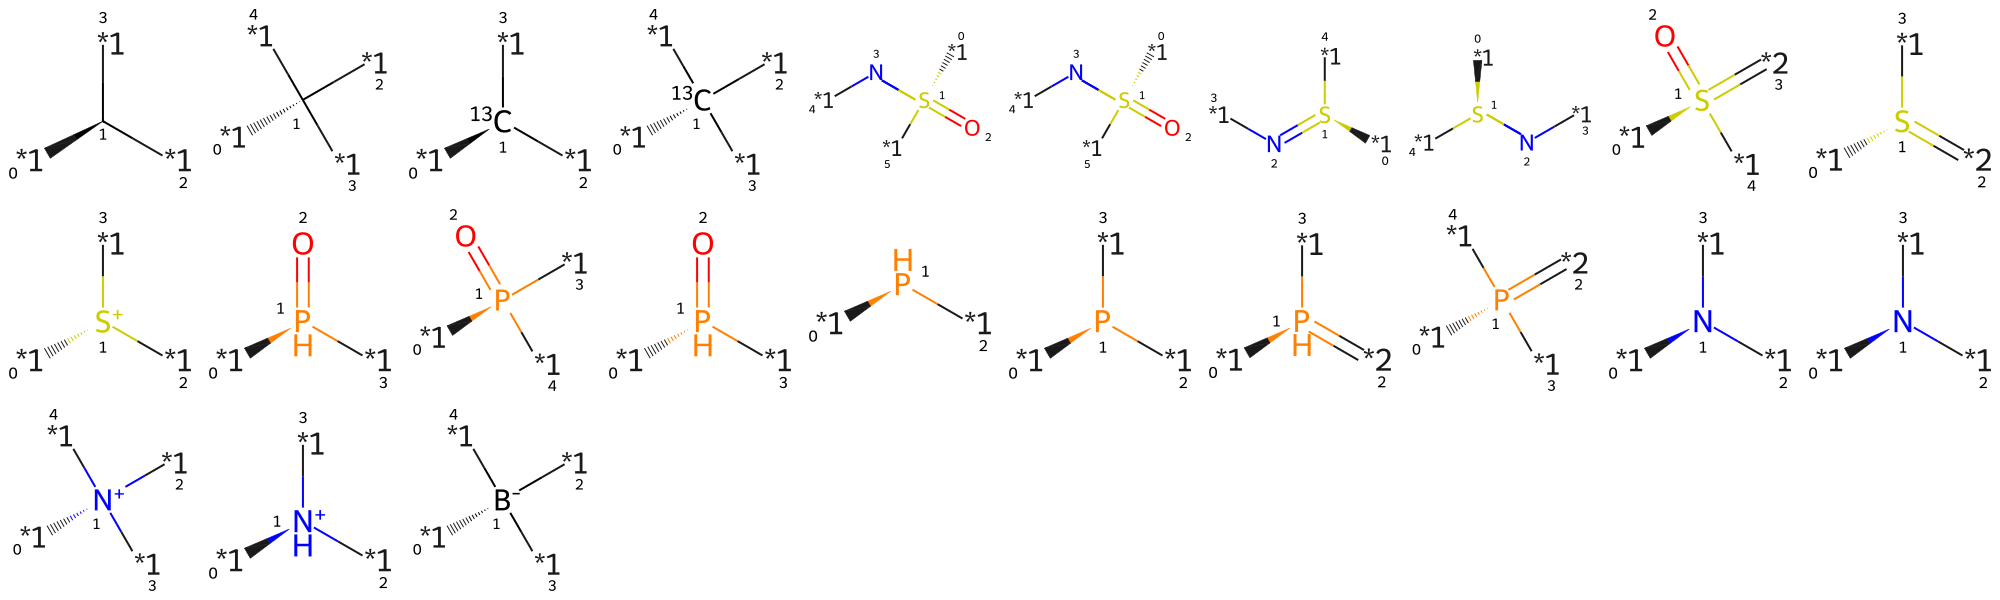

In [24]:
display(DrawMolsZoomed(list(map(lambda x: x.mol, GroupGrammar.essential_set().vocab.values()))))

100%|██████████| 1000/1000 [01:06<00:00, 14.96it/s]


Custom


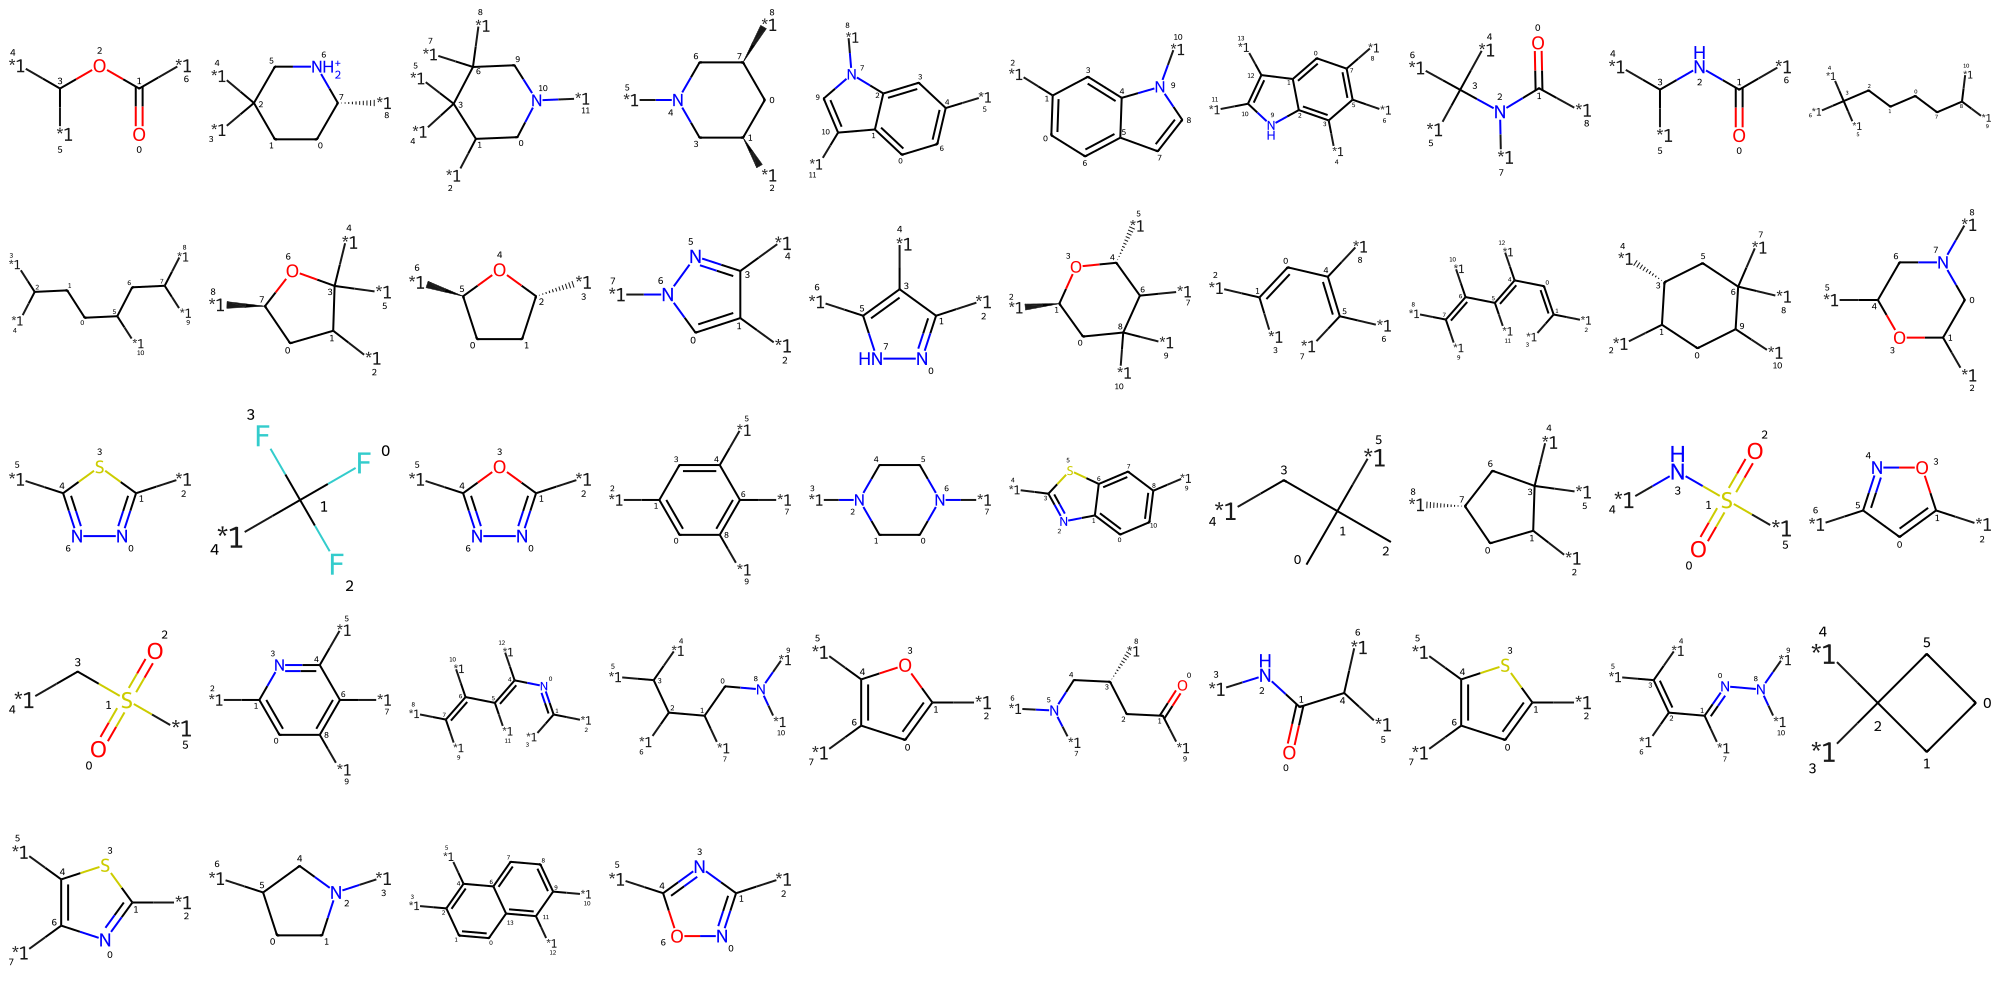

MMPA


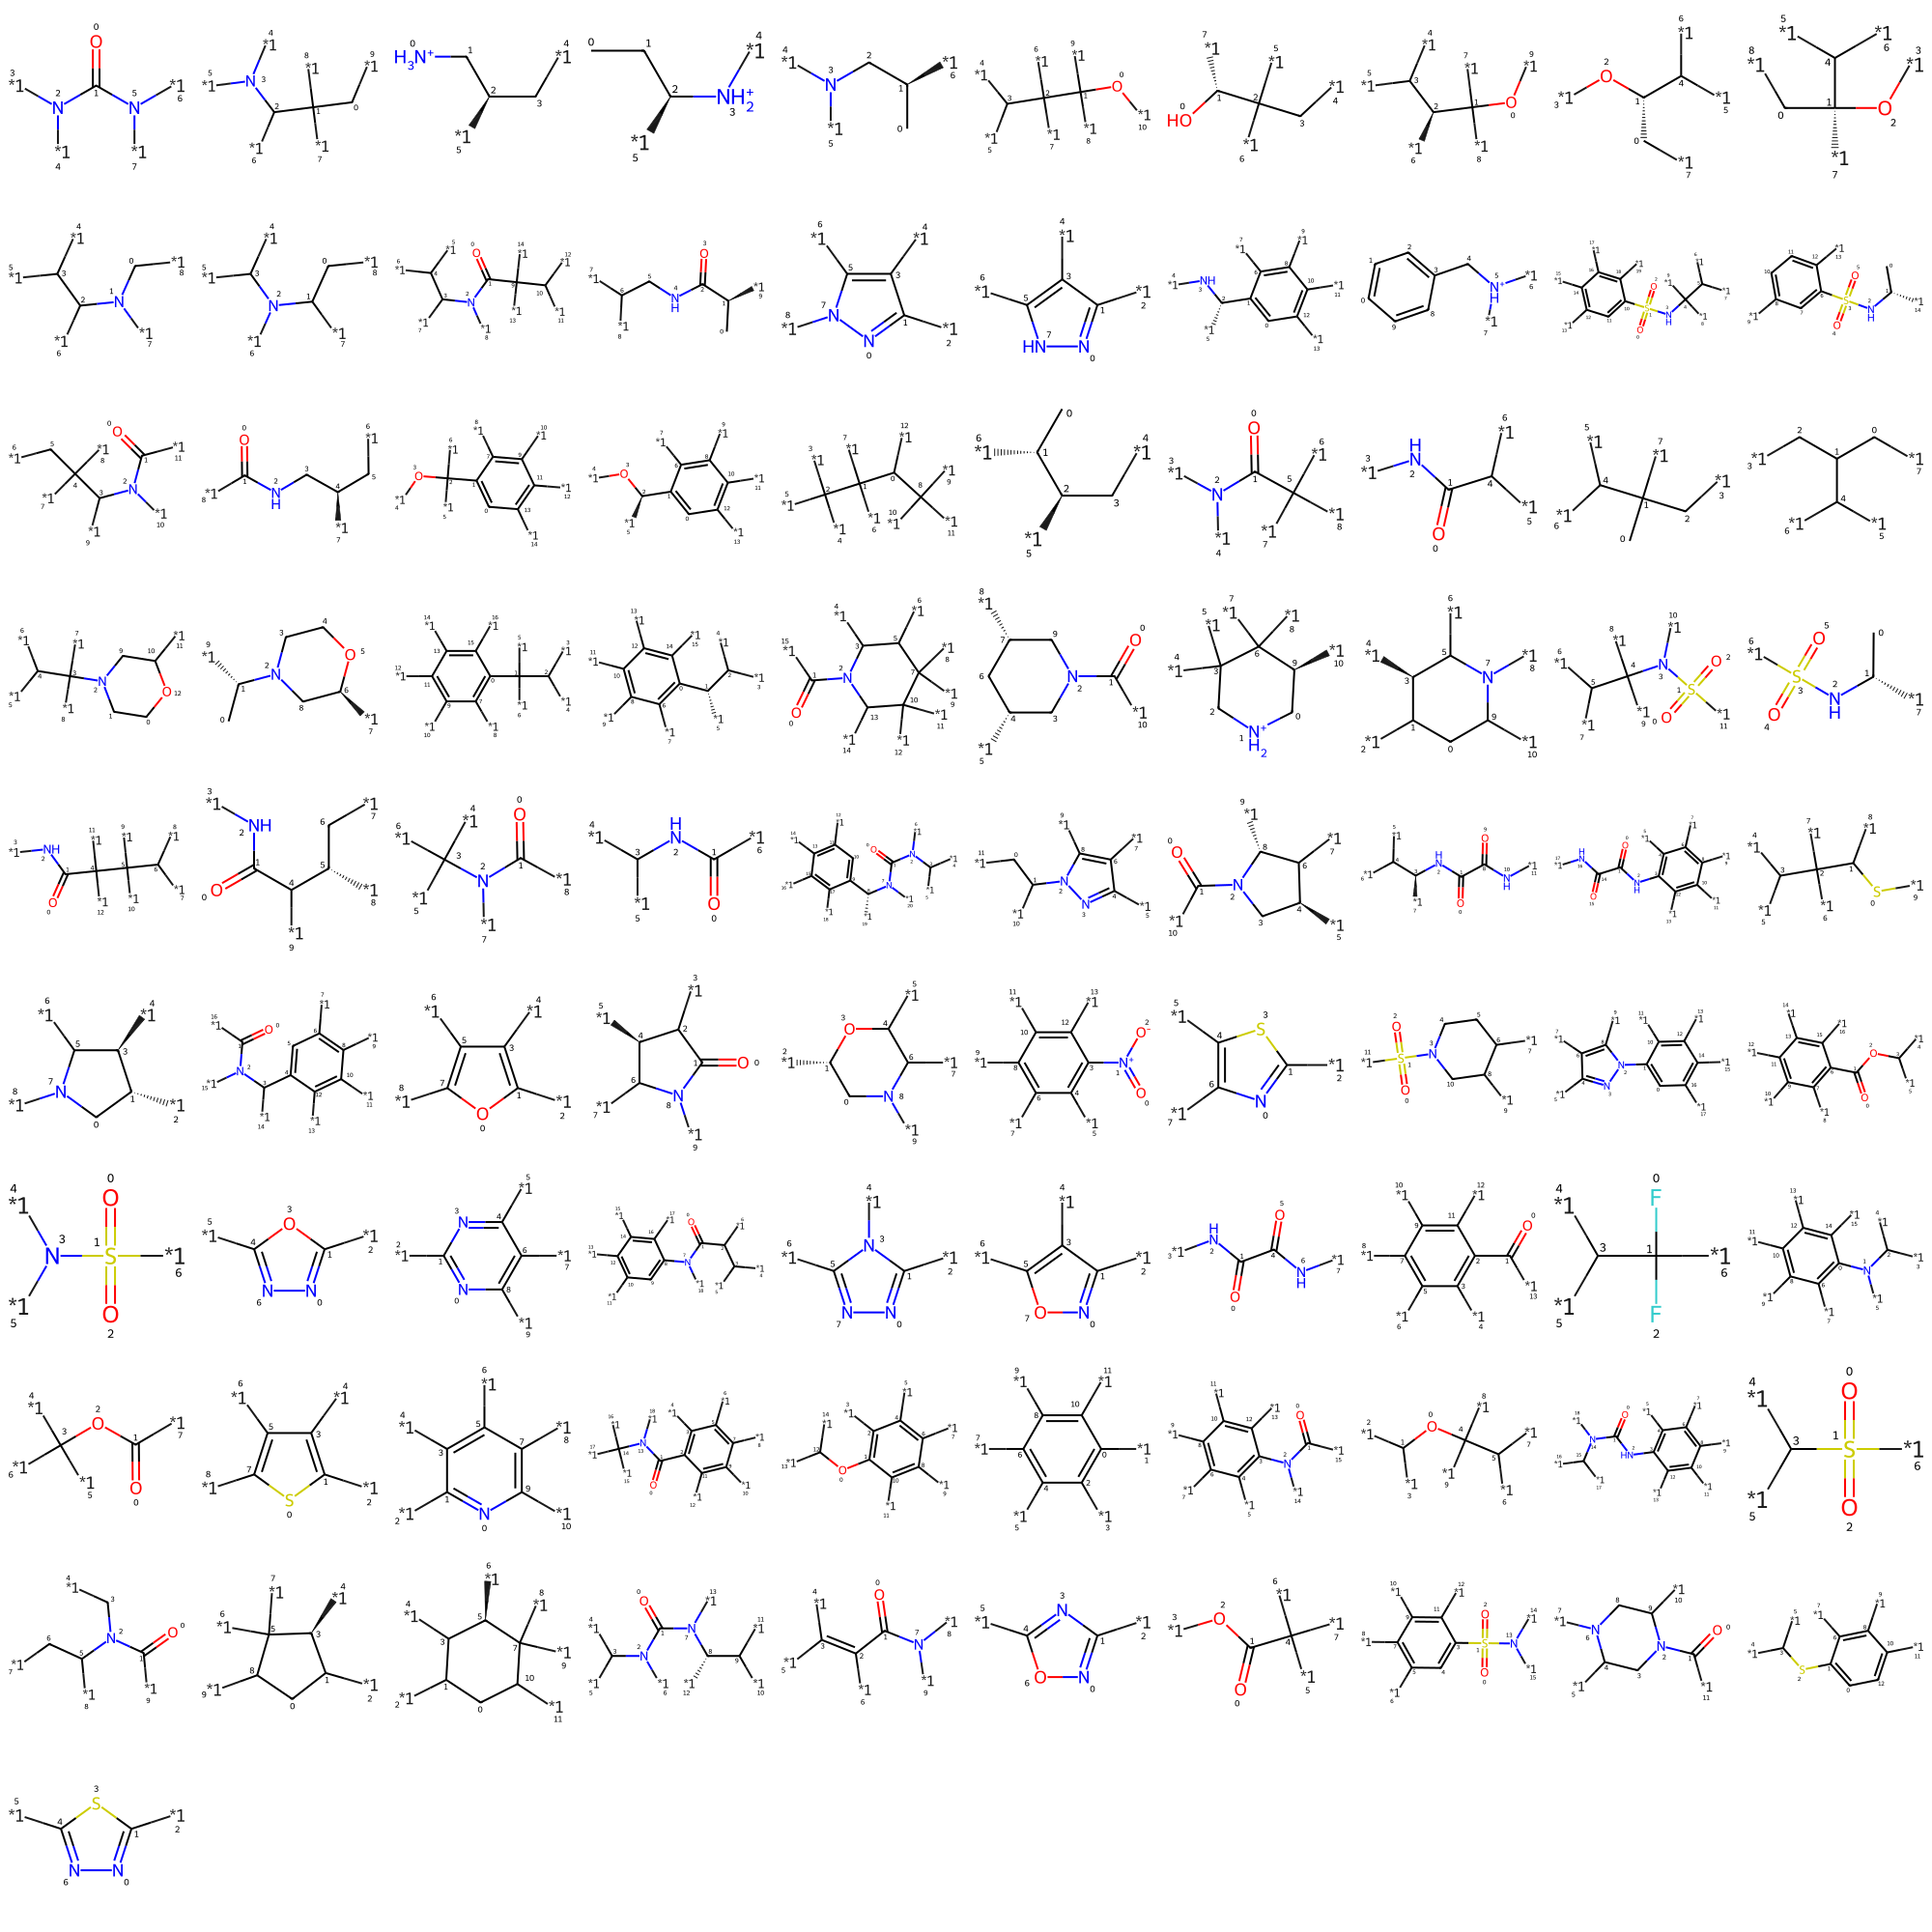

In [27]:
import random
random.seed(42)

# extracting a set of reasonable groups using fragmentation
zinc = [x.strip() for x in open('/content/group-selfies/tests/test_sets/zinc.csv')]
subset = random.sample(zinc, 1000)
fragments = fragment_mols(subset, convert=True, method='default') # use custom fragmentation technique
fragments_mmpa = fragment_mols(subset, convert=True, method='mmpa') # use MMPA fragmentation

vocab_fragment = dict([(f'frag{idx}', Group(f'frag{idx}', frag)) for idx, frag in enumerate(fragments)])
vocab_fragment_mmpa = dict([(f'frag{idx}', Group(f'frag{idx}', frag)) for idx, frag in enumerate(fragments_mmpa)])
print('Custom')
display(DrawMolsZoomed([g.mol for g in vocab_fragment.values()]))
print('MMPA')
display(DrawMolsZoomed([g.mol for g in vocab_fragment_mmpa.values()]))

In [26]:
import pandas as pd
d = pd.read_csv('/content/group-selfies/tests/test_sets/zinc.csv')
d.shape

(249456, 1)

In [28]:
len(vocab_fragment), len(vocab_fragment_mmpa)

(44, 91)

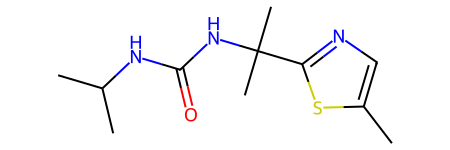

In [29]:
random.seed(42)

grammar_fragment = GroupGrammar(vocab=vocab_fragment)
grammar_fragment_mmpa = GroupGrammar(vocab=vocab_fragment_mmpa)
test = Chem.MolFromSmiles(random.choice(zinc))
display(test)

Group Name: frag40


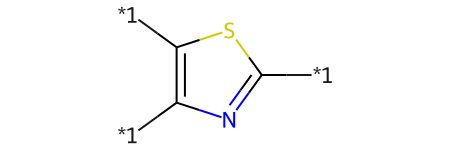

Group Name: frag7


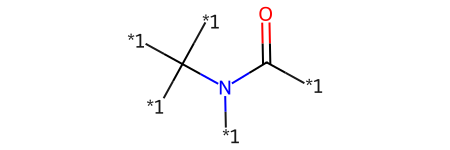

[C][:1frag40][Ring2][:0frag7][=Branch][N][C][Branch][C][pop][C][pop][Ring2][C][pop][Ring1][C][pop][pop]


In [30]:
#groups from the grammar using a custom fragmentation technique that appear in the molecule
extracted = grammar_fragment.extract_groups(test)
for group, _, _ in extracted:
    print('Group Name:', group.name)
    display(group.mol)
print(grammar_fragment.encoder(test, extracted))

Group Name: frag56


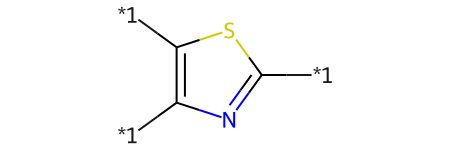

Group Name: frag0


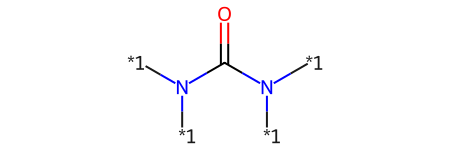

[C][:1frag56][Ring2][C][Branch][C][pop][Branch][C][pop][:0frag0][Ring2][C][Branch][C][pop][C][pop][pop]


In [31]:
#groups from the grammar using MMPA fragmentation that appear in the molecule

extracted = grammar_fragment_mmpa.extract_groups(test)
for group, _, _ in extracted:
    print('Group Name:', group.name)
    display(group.mol)
print(grammar_fragment_mmpa.encoder(test, extracted))

[:1frag43][pop][:1frag15][:1frag4][:1frag36][:1frag15][:1frag25][:3frag7][:2frag38][pop][:0frag4][:0frag37]


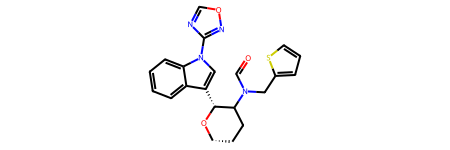

In [36]:
# to generate new molecules by combining random groups
# start with a grammar of groups, in this case `grammar_fragment` is a grammar of groups

# assign random overload_idxs
for group_name in grammar_fragment.vocab:
    group = grammar_fragment.vocab[group_name]
    group.overload_idx = random.randint(0, 100)

group_names = list(grammar_fragment.vocab.keys())

# pick n random groups
n = 10
n_pop = 2 # add pop tokens for extra branching
random_groups = [random.choice(group_names) for _ in range(n)] + ['[pop]' for _ in range(n_pop)]
random.shuffle(random_groups)

# combine them into a new group selfies string
new_gselfies = ''
for g in random_groups:
    if g == '[pop]':
        new_gselfies += '[pop]'
        continue
    start = random.randint(0, len(grammar_fragment.vocab[g].attachment_points)-1)
    new_gselfies += f"[:{start}{g}]"
print(new_gselfies)

grammar_fragment.decoder(new_gselfies)

In [44]:
! pip install selfies --quiet
! pip install PyTDC --quiet
! pip install pathos --quiet

In [49]:
import selfies as sf
from group_selfies.group_mol_graph import Group
from group_selfies.group_grammar import GroupGrammar
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.drawMolsSameScale = False # DrawMolsZoomed
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
# RDLogger.EnableLog('rdApp.*')
from tdc import Oracle
sascore = Oracle('SA')
qed = Oracle('QED')
import matplotlib.pyplot as plt
import numpy as np
from group_selfies.utils.fragment_utils import fragment_mols
from tqdm import tqdm
from pathos.multiprocessing import ProcessingPool as Pool
import re
import random
m = Chem.MolFromSmiles

In [104]:
def grid(mols, molsPerRow=10):
    return Draw.MolsToGridImage(mols, molsPerRow=10, maxMols=1000,
                                subImgSize=(125, 125), useSVG=True)
def split_selfies(selfies:str):
    left_idx = selfies.find('[')
    while 0 <= left_idx < len(selfies):
        right_idx = selfies.find(']', left_idx + 1)
        if right_idx == -1:
            print(selfies)
            raise ValueError('malformed SELFIES string, [ ')

        next_symbol = selfies[left_idx:right_idx+1]
        yield next_symbol

        left_idx = right_idx + 1
        if selfies[left_idx:left_idx+1] == '.':
            yield '.'
            left_idx += 1

def shuffle(selfies):
    """
    Shuffle a SELFIES string
    """
    return "".join(sorted(split_selfies(selfies),
                          key=lambda x: random.random()))



In [69]:
shuffle(sf.encoder('CCC'))

'[C][C][C]'

In [76]:
chembl_path = '/content/drive/MyDrive/Drug_design/Drug_design/drugs_chembl.csv'
# chembl = [x.strip() for x in open(chembl_path)]
import pandas as pd

# chembl = pd.read_csv(chembl_path)
# chembl.head, chembl.shape

ParserError: ignored

In [75]:
fda_path = '/content/drive/MyDrive/Drug_design/Drug_design/fda.csv'
fda = pd.read_csv(fda_path)

In [80]:
N = 1000
smis = random.sample(sorted(fda.smiles), N)
sels = [sf.encoder(smi) for smi in tqdm(smis)]

100%|██████████| 1000/1000 [00:00<00:00, 1005.77it/s]


Fragment vocabulary size: 53


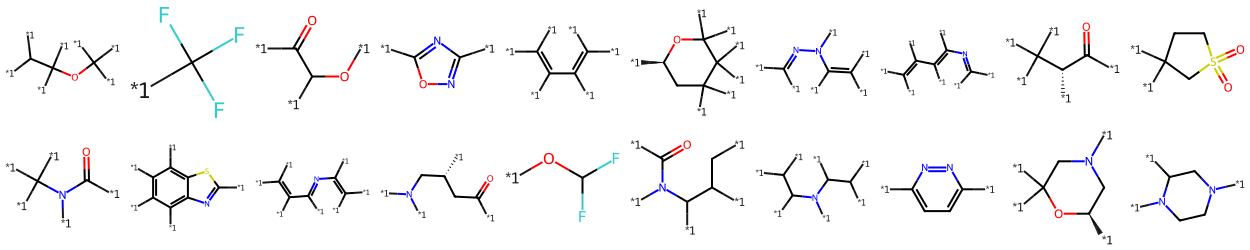

In [82]:
empty_grammar = GroupGrammar()
load_from_disk = True
if load_from_disk:
    grammar = GroupGrammar.from_file(
        '/content/group-selfies/experiments/useful30.txt'
    ) | GroupGrammar.essential_set()
else:
    fragments = fragment_mols(smis, convert=True, method='default', target=500)
    vocab_fragment = dict([(f'frag{idx}', Group(f'frag{idx}', frag)) \
                           for idx, frag in enumerate(fragments)])
    grammar = GroupGrammar(vocab_fragment)
    grammar.to_file('fda_test_grammar.txt')
print('Fragment vocabulary size:', len(grammar.vocab))
display(grid([g.mol for g in grammar.vocab.values()][:20]))

In [85]:
split_sels = [list(split_selfies(selfi)) for selfi in sels]
selfi_lengths = [len(selfi) for selfi in split_sels]
# selfi_lengths

100%|██████████| 1000/1000 [00:00<00:00, 3049.28it/s]


Length of SELFIES strings: 
41.53 +/- 20.12 tokens
Total number of SELFIES tokens: 41531


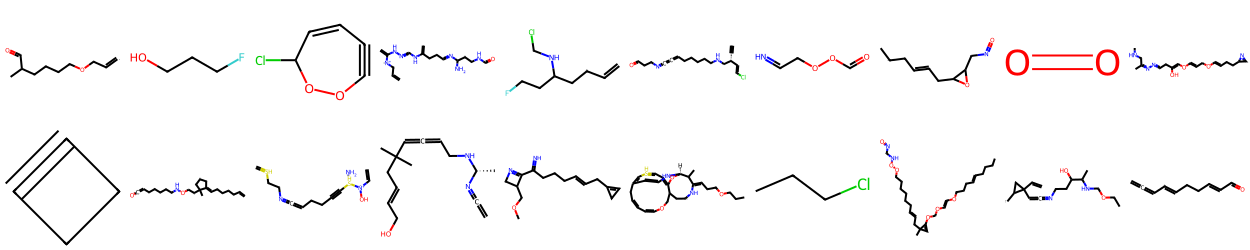

In [92]:
selfi_alphabet = [token for selfi in split_sels for token in selfi]

gen_selfi_smis = []
gen_selfis = []
for i in tqdm(range(N)):
    while True:
        gen_selfi = ''.join(random.sample(selfi_alphabet,
                                          random.choice(selfi_lengths)))
        gen_selfi_smi = sf.decoder(gen_selfi)
        if gen_selfi_smi != '':
            break
    gen_selfis.append(gen_selfi)
    gen_selfi_smis.append(gen_selfi_smi)
gen_selfi_mols = [m(smi) for smi in gen_selfi_smis]
print(f"Length of SELFIES strings: \n\
    {np.mean(selfi_lengths):.2f} +/- {np.std(selfi_lengths):.2f} tokens")
print(f"Total number of SELFIES tokens: {len(selfi_alphabet)}")

grid(gen_selfi_mols[:20])

In [110]:
def g_encoder(smi):
    encoded = grammar.full_encoder(m(smi))
    decoded = Chem.MolToSmiles(grammar.decoder(encoded))
    assert Chem.CanonSmiles(smi) == decoded, (smi, decoded, len(grammar.vocab))
    return encoded

In [111]:
print('Encoding...', end='')
with Pool() as p: gselfis = p.map(g_encoder, smis)
print('Done Encoding')

Encoding...Done Encoding


In [112]:
split_gselfis = [list(split_selfies(selfi)) for selfi in gselfis]
gselfi_lengths = [len(selfi) for selfi in split_gselfis]
gselfi_alphabet = [token for selfi in split_gselfis for token in selfi]

100%|██████████| 1000/1000 [00:01<00:00, 847.42it/s]

Length of Group SELFIES strings: 
        39.54 +/- 26.11
Total number of Group SELFIES tokens: 39537


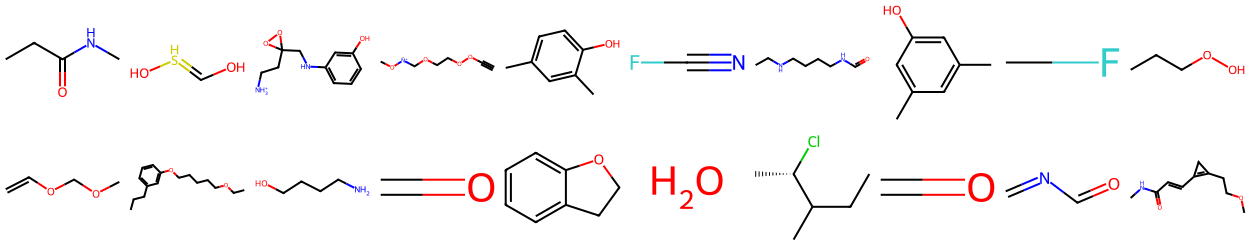

In [113]:
gen_gselfis = []
gen_gselfi_smis = []
for i in tqdm(range(N)):
    while True:
        gen_gselfi = ''.join(random.sample(gselfi_alphabet,
                                           random.choice(gselfi_lengths)))
        gen_mol = grammar.decoder(gen_gselfi)
        gen_gselfi_smi = Chem.MolToSmiles(gen_mol)
        if gen_gselfi_smi != '':
            break
    gen_gselfis.append(gen_gselfi)
    gen_gselfi_smis.append(gen_gselfi_smi)
gen_gselfi_mols = [m(smi) for smi in gen_gselfi_smis]
print(f"Length of Group SELFIES strings: \n\
        {np.mean(gselfi_lengths):.2f} +/- {np.std(gselfi_lengths):.2f}")
print(f"Total number of Group SELFIES tokens: {len(gselfi_alphabet)}")

grid(gen_gselfi_mols[:20])

In [114]:
substring_dict = dict()
for key, val in grammar.vocab.items():
    gmol = Chem.RWMol(val.mol)
    remove = []
    for atom in val.mol.GetAtoms():
        if atom.GetSymbol() == '*':
            remove.append(atom.GetIdx())
    for i in reversed(remove):
        gmol.RemoveAtom(i)
    substring_dict[key] = empty_grammar.full_encoder(m(Chem.MolToSmiles(gmol)))



100%|██████████| 1000/1000 [00:01<00:00, 710.04it/s]


Length of Substring SELFIES strings: 
        48.88 +/- 31.85


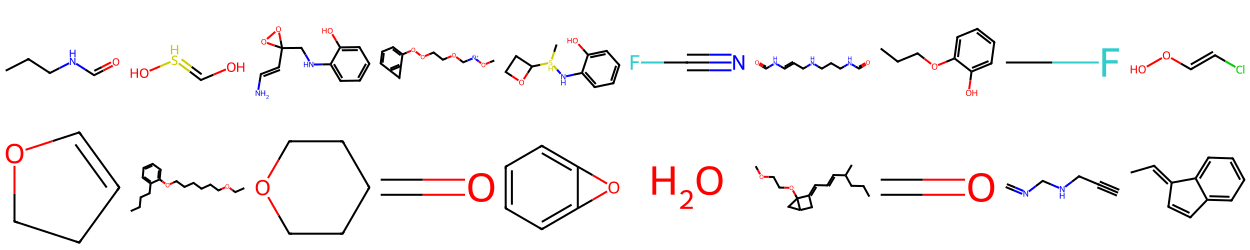

In [117]:
gen_subgselfis = []
subgselfi_lengths = []
for gen_gselfi in gen_gselfis:
    substring_gselfi = ''
    for tok in split_selfies(gen_gselfi):
        match_ = re.search(r"\[:(.*?)\d+(.*)\]", tok)
        if match_ is not None:
            substring_gselfi += substring_dict[match_.group(2)]
        else: substring_gselfi += tok
    gen_subgselfis.append(substring_gselfi)
    subgselfi_lengths.append(len(list(split_selfies(substring_gselfi))))

gen_subgselfi_smis = [Chem.MolToSmiles(empty_grammar.decoder(selfi)) for selfi in tqdm(gen_subgselfis)]
gen_subgselfi_mols = [m(smi) for smi in gen_subgselfi_smis]
print(f"Length of Substring SELFIES strings: \n\
        {np.mean(subgselfi_lengths):.2f} +/- {np.std(subgselfi_lengths):.2f}")

grid(gen_subgselfi_mols[:20])

100%|██████████| 1000/1000 [00:01<00:00, 546.86it/s]


Length of Group SELFIES strings with no groups: 43.58 +/- 21.14
Total number of Group SELFIES tokens with no groups: 43580


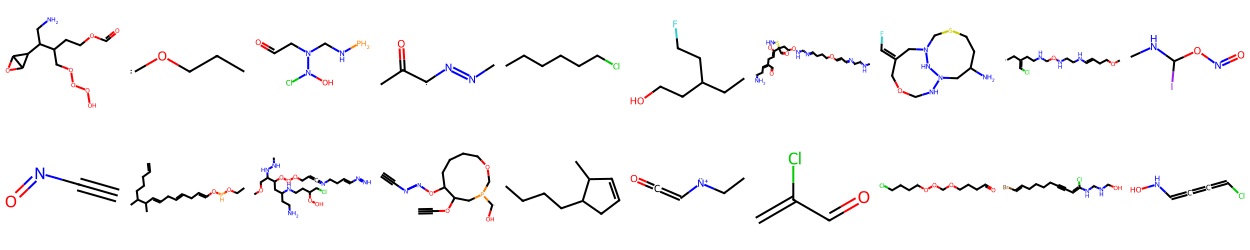

In [118]:
# group selfies with no groups

# encode all molecules into Group SELFIES
nogselfis = [empty_grammar.full_encoder(m(smi)) for smi in tqdm(smis)]

# split all selfies into tokens
split_nogselfis = [list(split_selfies(selfi)) for selfi in nogselfis]

# count the number of tokens in each selfi
nogselfi_lengths = [len(selfi) for selfi in split_nogselfis]

# combine all tokens from split_selfis into one list
nogselfi_alphabet = [token for selfi in split_nogselfis for token in selfi]

gen_nogselfis = []
gen_nogselfi_smis = []
for i in tqdm(range(N)):
    while True:
        gen_nogselfi = ''.join(random.sample(nogselfi_alphabet, random.choice(nogselfi_lengths)))
        gen_nogselfi_mol = grammar.decoder(gen_nogselfi)
        gen_nogselfi_smi = Chem.MolToSmiles(gen_nogselfi_mol)
        if gen_nogselfi_smi != '':
            break
    gen_nogselfis.append(gen_nogselfi)
    gen_nogselfi_smis.append(gen_nogselfi_smi)

# decode into RDKit moles
gen_nogselfi_mols = [m(smi) for smi in gen_nogselfi_smis]

print(f"Length of Group SELFIES strings with no groups: {np.mean(nogselfi_lengths):.2f} +/- {np.std(nogselfi_lengths):.2f}")
print(f"Total number of Group SELFIES tokens with no groups: {len(nogselfi_alphabet)}")

grid(gen_nogselfi_mols[:20])

In [119]:
with Pool() as p:
    sascores = p.map(sascore, smis)
    qeds = p.map(qed, smis)
    selfi_sascores = p.map(sascore, gen_selfi_smis)
    selfi_qeds = p.map(qed, gen_selfi_smis)
    gselfi_sascores = p.map(sascore, gen_gselfi_smis)
    gselfi_qeds = p.map(qed, gen_gselfi_smis)
    subgselfi_sascores = p.map(sascore, gen_subgselfi_smis)
    subgselfi_qeds = p.map(qed, gen_subgselfi_smis)
    nogselfi_sascores = p.map(sascore, gen_nogselfi_smis)
    nogselfi_qeds = p.map(qed, gen_nogselfi_smis)

In [121]:
import pandas as pd

values = "FDA|Group SELFIES|SELFIES|Substring SELFIES|No-Group SELFIES".split('|')
cat_order = "FDA|Group SELFIES|SELFIES|Substring SELFIES|No-Group SELFIES".split('|')
df = pd.DataFrame({"FDA": sascores, "SELFIES": selfi_sascores,
                   "Group SELFIES": gselfi_sascores,
                   "Substring SELFIES": subgselfi_sascores,
                   "No-Group SELFIES": nogselfi_sascores})

df = df.melt(value_vars=values, var_name="Type",
             value_name="SAScore").drop("Type", axis=1)

smiles_df = pd.DataFrame({"FDA": smis, "SELFIES": gen_selfi_smis,
                          "Group SELFIES": gen_gselfi_smis,
                          "Substring SELFIES": gen_subgselfi_smis,
                          "No-Group SELFIES": gen_nogselfi_smis})

smiles_df = smiles_df.melt(value_vars=values, var_name="Type",
                           value_name="SMILES")

qed_df = pd.DataFrame({"FDA": qeds, "SELFIES": selfi_qeds,
                       "Group SELFIES": gselfi_qeds,
                       "Substring SELFIES": subgselfi_qeds,
                       "No-Group SELFIES": nogselfi_qeds}).melt(
                          value_vars=values, var_name="Type",
                          value_name="QED").drop("Type", axis=1)
df = pd.concat([df, smiles_df, qed_df], axis=1)
df

,SAScore,Type,SMILES,QED
0,3.020520,FDA,CC(C)(C(=O)O)c1ccc([C@@H](O)CCCN2CCC(C(O)(c3cc...,0.341306
1,5.589396,FDA,C[N+]1(CC2CC2)CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)...,0.791390
2,3.099204,FDA,CCC[C@@](C)(COC(N)=O)COC(=O)NC(C)C,0.732310
3,3.407609,FDA,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,0.606054
4,4.585538,FDA,CC[C@@H]1[C@@H]2C[C@H](O)CC[C@]2(C)[C@H]2CC[C@...,0.577157
...,...,...,...,...
4995,5.755235,No-Group SELFIES,C=CN(C=CNOC(C#CNOC=O)(N=N)NC)CC,0.084754
4996,4.253907,No-Group SELFIES,C[CH]C[CH]CCC1CCN(C=O)CC(=O)C1,0.510102
4997,6.322390,No-Group SELFIES,[CH][CH]C(CCC=C=NCC)CCCCCC=CC12C=CC1[SH]1C(CC)N12,0.144065
4998,6.113349,No-Group SELFIES,[CH]NCC=NC(C)(NN)NCN=CO[CH]C1CC1CC,0.108713


In [122]:
cat_order

['FDA', 'Group SELFIES', 'SELFIES', 'Substring SELFIES', 'No-Group SELFIES']

In [123]:
from scipy.stats import wasserstein_distance
counts, bin_edges = np.histogram(df.SAScore, bins='auto')

each_counts = []
for i in cat_order:
    counts, bin_edges = np.histogram(df[df.Type == i].SAScore, bins=bin_edges)
    each_counts.append(counts)

sascore_wassersteins = [wasserstein_distance(bin_edges[:-1], bin_edges[:-1],
                each_counts[0], each_counts[i]) for i in range(len(cat_order))]
sascore_wassersteins

[0.0,
 0.4592004563821388,
 1.3202579755310753,
 0.6643220817650783,
 1.467356246109559]

In [124]:
from scipy.stats import wasserstein_distance
counts, bin_edges = np.histogram(df.QED, bins='auto')

each_counts = []
for i in cat_order:
    counts, bin_edges = np.histogram(df[df.Type == i].QED, bins=bin_edges)
    each_counts.append(counts)

qed_wassersteins = [wasserstein_distance(bin_edges[:-1], bin_edges[:-1],
                each_counts[0], each_counts[i]) for i in range(len(cat_order))]
qed_wassersteins

[0.0,
 0.14031916678043949,
 0.1791970790101896,
 0.14561695227516155,
 0.2035215415929601]

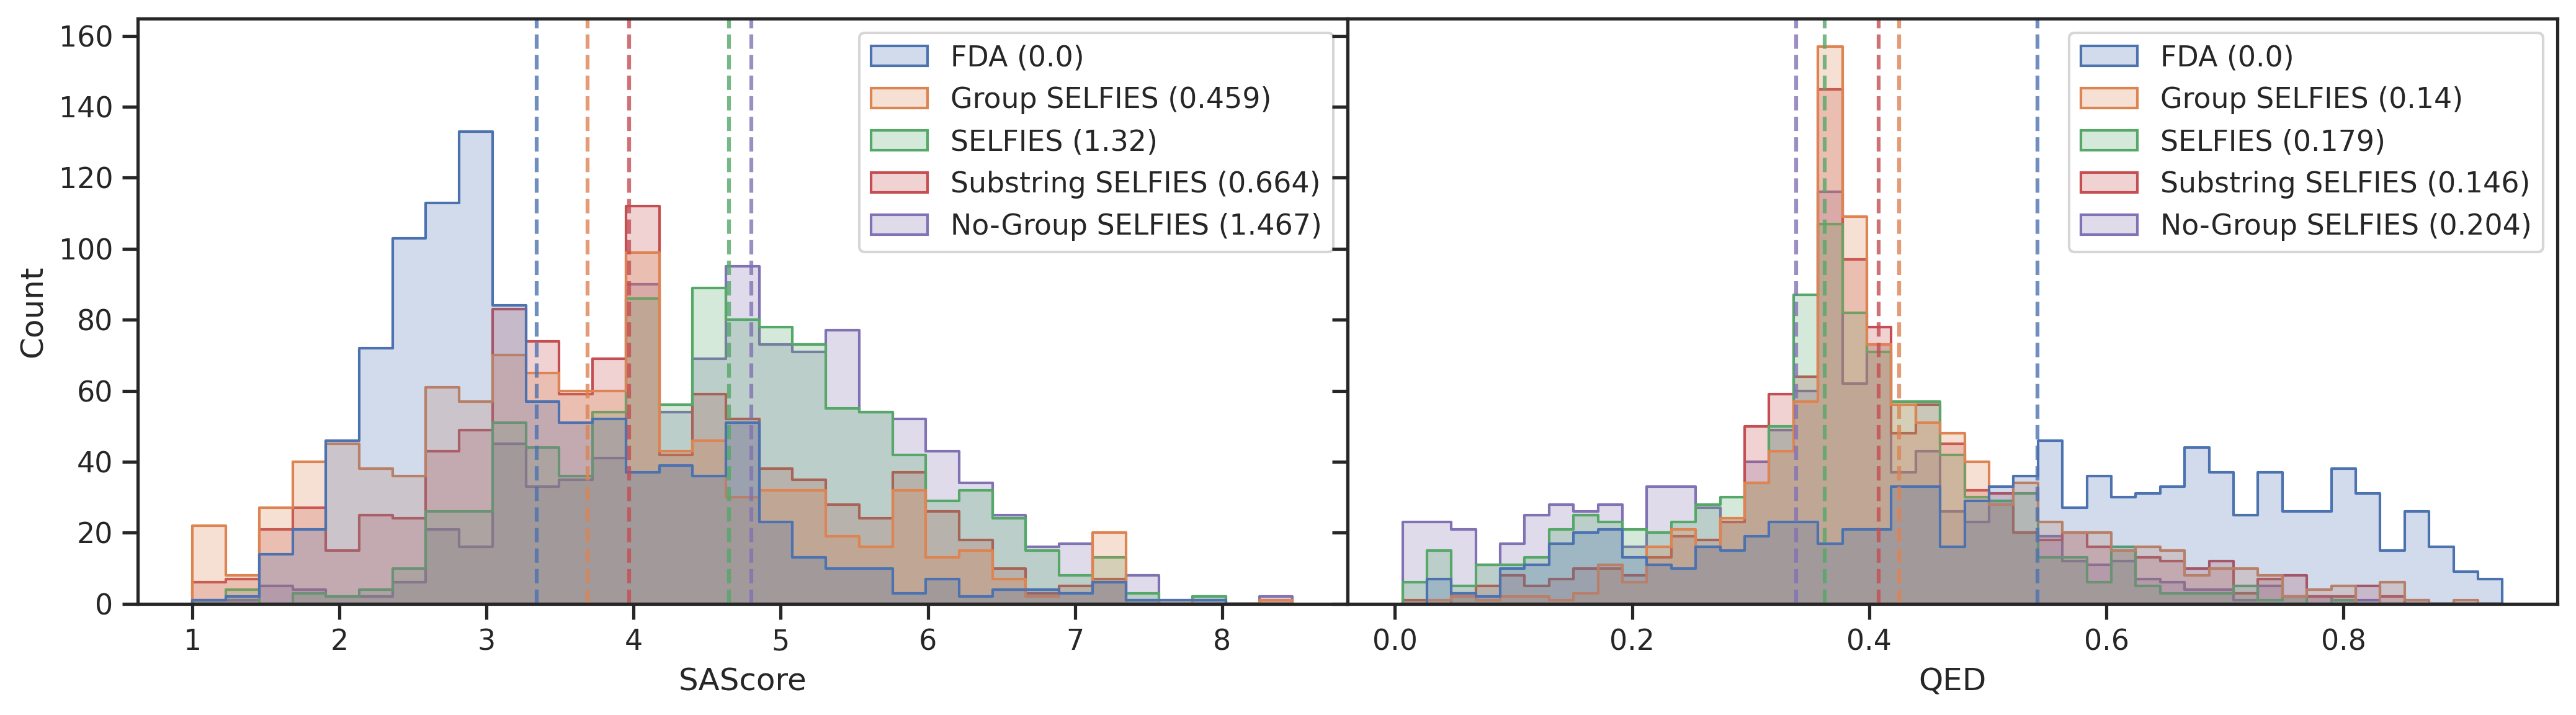

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# show means and show wasserstein distance

indices = [0, 1, 2, 3, 4]

my_sascore_wass = [sascore_wassersteins[i] for i in indices]
my_cat_order = [cat_order[i] for i in indices]
my_qed_wass = [qed_wassersteins[i] for i in indices]

sns.set(style="ticks")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), sharey=True, dpi=300)
sns.histplot(data=df, x="SAScore", hue="Type", ax=ax1,
             hue_order=my_cat_order, element='step')
leg = ax1.get_legend()
leg.set_title(None)

for i, tex in enumerate(leg.get_texts()):
    tex.set_text(tex.get_text() + f' ({round(my_sascore_wass[i], 3)})')

for i, cat in enumerate(my_cat_order):
    ax1.axvline(df[df.Type == cat].SAScore.mean(),
                color=f'C{i}', linestyle='--', alpha=0.8)

sns.histplot(data=df, x="QED", hue="Type", ax=ax2,
             hue_order=my_cat_order, element='step')
sns.move_legend(ax2, 'upper right')
leg = ax2.get_legend()
leg.set_title(None)

for i, tex in enumerate(leg.get_texts()):
    tex.set_text(tex.get_text() + f' ({round(my_qed_wass[i], 3)})')

for i, cat in enumerate(my_cat_order):
    ax2.axvline(df[df.Type == cat].QED.mean(),
                color=f'C{i}', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.subplots_adjust(wspace=0)

# plt.savefig('figures/zinc_gselfi_selfi.png')